<a href="https://colab.research.google.com/github/comaserious/deep_learning_practice/blob/main/%EB%B3%B4%EC%8A%A4%ED%84%B4_%EC%A3%BC%ED%83%9D_%EA%B0%80%EA%B2%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [22]:
boston_df = pd.read_csv('/content/sample_data/Boston.csv')
boston_df.head()

boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


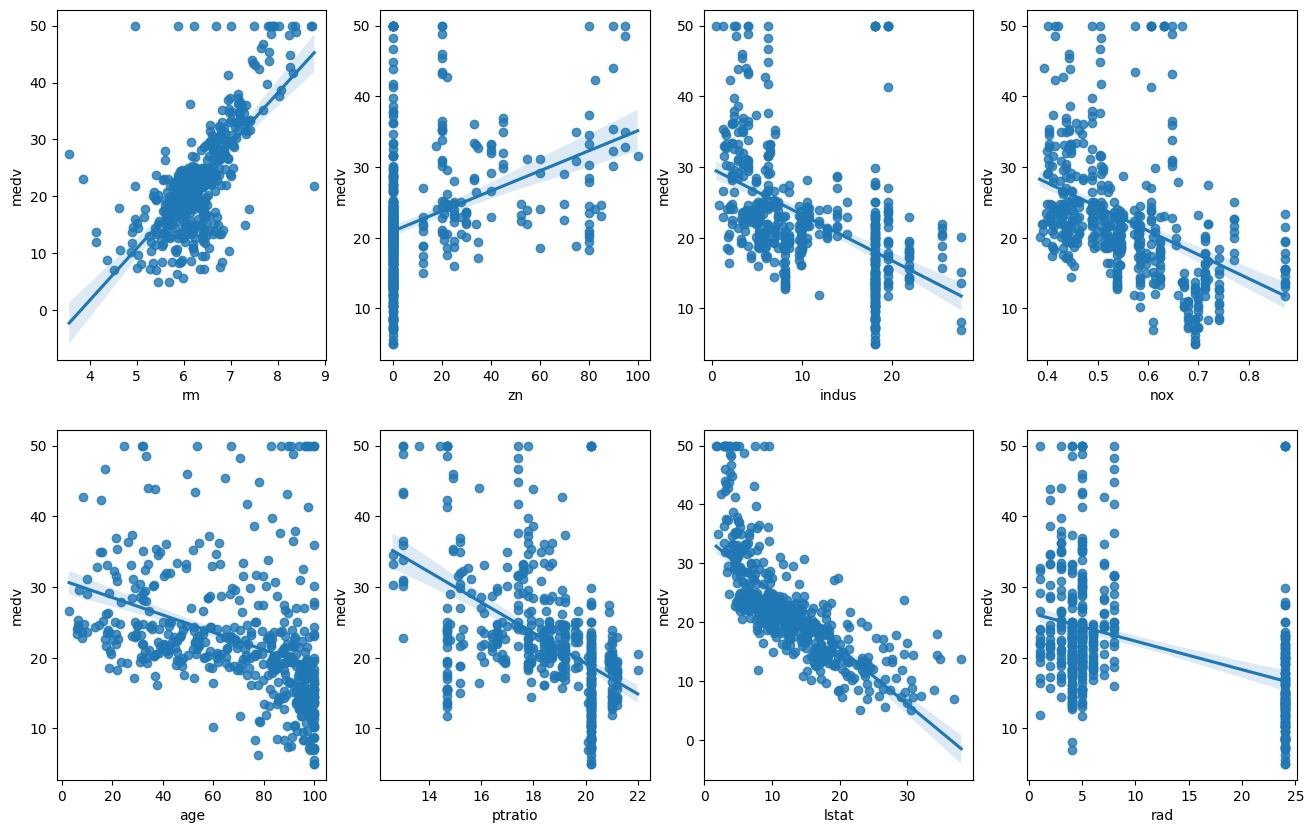

In [17]:
fig,axs = plt.subplots(figsize=(16,10) , ncols =4, nrows = 2)

lm_features = ['rm', 'zn' , 'indus' , 'nox', 'age' , 'ptratio' , 'lstat' , 'rad']

for i ,feature in enumerate(lm_features):
  row = int(i/4)
  column = i%4

  sns.regplot(x=feature , y ='medv' , data = boston_df , ax = axs[row][column] )

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

boston_df.drop('Unnamed: 0', axis=1 , inplace=True)
x_data  = boston_df.drop('medv' , axis=1)
y_data = boston_df['medv']

In [24]:
boston_df.shape

(506, 14)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x_data , y_data , test_size=0.2 , random_state = 100)

In [26]:
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [28]:
pred = lr_model.predict(x_test)

mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

print('MSE : ', mse)
print('RMSE : ', rmse)
print('R2 : ', r2)

MSE :  23.61699410056368
RMSE :  4.859731895955134
R2 :  0.75550330868713


In [29]:
np.round(lr_model.coef_,1)

array([ -0.1,   0. ,  -0. ,   3.1, -16.1,   3.7,  -0. ,  -1.5,   0.3,
        -0. ,  -0.9,   0. ,  -0.5])

In [30]:
lr_model.intercept_

36.33377028550763

In [33]:
from sklearn.model_selection import cross_val_score

mean_score = cross_val_score(lr_model,x_data,y_data,cv=5,scoring='neg_mean_squared_error')
print(mean_score)
np.sqrt((mean_score*-1)).mean()

[-12.46030057 -26.04862111 -33.07413798 -80.76237112 -33.31360656]


5.828658946215802

In [34]:
from sklearn.preprocessing import PolynomialFeatures

x = np.arange(4).reshape(2,2)
x

poly = PolynomialFeatures(2)
poly.fit_transform(x)


array([[1., 0., 1., 0., 0., 1.],
       [1., 2., 3., 4., 6., 9.]])

In [35]:
from sklearn.linear_model import Ridge, Lasso , ElasticNet

ridge_model = Ridge(alpha=200)

mean_score = cross_val_score(ridge_model, x_data , y_data , cv=5 , scoring='neg_mean_squared_error')
print(mean_score)
np.sqrt((mean_score*-1)).mean()

[-13.63016837 -28.7666567  -38.49672823 -47.62702106 -20.62504707]


5.340529728782313

In [37]:
en_model = ElasticNet(alpha=5,l1_ratio=0.7)

mean_score = cross_val_score(en_model,x_data,y_data,cv=5,scoring='neg_mean_squared_error')
np.sqrt((mean_score*-1)).mean()

6.311370402797115

In [40]:
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 모델들 정의
xb_model = XGBRegressor(n_estimators=100)
lg_model = LGBMRegressor(n_estimators=100)
dt_model = DecisionTreeRegressor(max_depth=5)
rf_model = RandomForestRegressor(n_estimators=100)

# 각 모델에 대한 MSE를 음수로 반환하여 sqrt 후 평균 계산
def calculate_rmse(model, x_data, y_data):
    mean_score = cross_val_score(model, x_data, y_data, cv=5, scoring='neg_mean_squared_error')
    rmse = np.sqrt(-mean_score.mean())  # cross_val_score는 음수를 반환하므로 -1을 곱해줌
    return rmse

# 모델별 RMSE 계산
xb_rmse = calculate_rmse(xb_model, x_data, y_data)
lg_rmse = calculate_rmse(lg_model, x_data, y_data)
dt_rmse = calculate_rmse(dt_model, x_data, y_data)
rf_rmse = calculate_rmse(rf_model, x_data, y_data)

# 출력
print(f"XGBRegressor RMSE: {xb_rmse}")
print(f"LGBMRegressor RMSE: {lg_rmse}")
print(f"DecisionTreeRegressor RMSE: {dt_rmse}")
print(f"RandomForestRegressor RMSE: {rf_rmse}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000080 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 996
[LightGBM] [Info] Number of data points in the train set: 404, number of used features: 13
[LightGBM] [Info] Start training from score 22.566089
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -